# Histogram of weights and residuals

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
sys.path.append("..")
from utils.model import Net_mask
from utils.data import Data
from scripts.parameters import get_parameters
import torch
import numpy as np
import matplotlib.pyplot as plt

In [7]:
model = Net_mask()
run = 0
outer_folder = 'map'
name = '../saved_models/' + str(outer_folder) + '/' + str(run) + '/model_weights.pth'
model.load_state_dict(torch.load(name))
model.eval()

Net_mask(
  (layers): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=10, bias=True)
  )
)

In [8]:
n = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(n)

940


(array([  2.,   1.,   1.,   2.,   5.,   4.,   1.,   1.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   6.,
          5.,   0.,   2.,   0.,   2.,   1.,   1.,   3.,   3.,   2.,   2.,
          6.,   8.,   9.,   7.,   7.,   9.,   6.,   8.,   4.,   9.,   7.,
          8.,  19.,  29.,  30.,  75., 252., 157.,  46.,  32.,  18.,  14.,
          8.,   9.,   8.,   3.,  10.,   3.,   9.,   3.,   4.,  15.,   9.,
          1.,   1.,   1.,   3.,   0.,   0.,   3.,   0.,   3.,   3.,   6.,
          5.,   1.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   1.,   3.,   3.,   5.,   2.,   0.,   2.,
          1.]),
 array([-0.9785058 , -0.9588462 , -0.9391866 , -0.919527  , -0.89986736,
        -0.8802078 , -0.8605482 , -0.84088856, -0.821229  , -0.8015694 ,
        -0.78190976, -0.7622502 , -0.74259055, -0.72293097, -0.7032714 ,
        -0.68361175, -0.6639522 , -0.6442926 , -0.62463295, -0.6049734 ,
        -0.58531374, -0.56

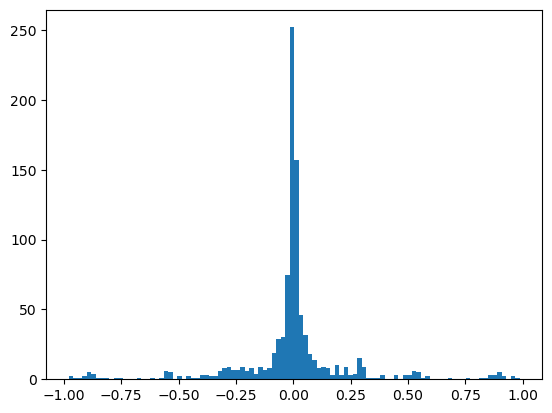

In [9]:
params = torch.cat([param.view(-1) for param in model.parameters()]).detach().numpy()
plt.hist(params, bins=100)

In [10]:
tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps, tensor_Q_m, sigma2_eps, tau2 = get_parameters()
data_generator = Data(tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps)
tensor_input = data_generator.get_tensor_data(100)
tensor_Psi = model(tensor_input)
tensor_Gd = tensor_input[:,:10]
tensor_mask = tensor_input[:,10:]
tensor_GPsi = tensor_Psi*tensor_mask

diff = tensor_GPsi - tensor_Gd
a  = diff.flatten()
b = a.detach().numpy()
c = []
for i in b:
    if abs(i) > 10**(-10):
        c.append(i)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  0.,
         0.,  1.,  2.,  0.,  2.,  1.,  5.,  5.,  5.,  1.,  7.,  9.,  4.,
         9.,  8.,  6., 12., 17.,  8., 13., 15.,  9., 14., 17., 20., 21.,
        16., 24., 20., 25., 15., 10.,  6.,  7.,  9.,  6., 10.,  3.,  6.,
         5.,  7.,  4.,  2.,  3.,  4.,  3.,  1.,  6.,  0.,  2.,  0.,  1.,
         1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.10084474, -0.09821735, -0.09558997, -0.09296258, -0.09033519,
        -0.0877078 , -0.08508042, -0.08245303, -0.07982565, -0.07719826,
        -0.07457087, -0.07194348, -0.0693161 , -0.06668871, -0.06406132,
        -0.06143393, -0.05880655, -0.05617916, -0.05355177, -0.05092439,
        -0.048297  , -0.04566961, -0.04304223, -0.04041484, -0.03778745,
        -0.03516006, -0.03253268, -0.02990529, -0.0272779 , -0.024650

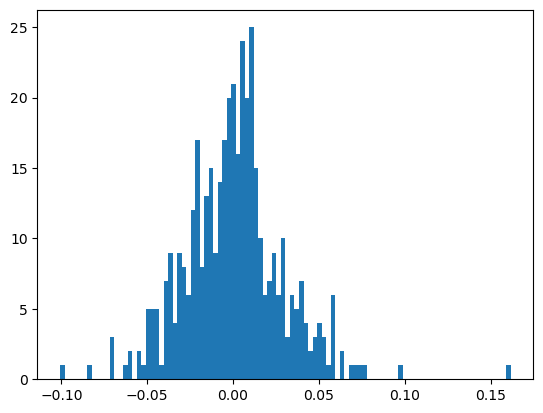

In [11]:
plt.hist(c, bins=100)

In [12]:
# Try adding gauss noise to data.
from torch.distributions.multivariate_normal import MultivariateNormal
n_param = 10
sigma2_eps = 0.1
tensor_mu_m = torch.zeros(n_param)
tensor_mu_eps_noise = torch.zeros(n_param)
tensor_Sigma_eps = torch.eye(n_param)*sigma2_eps
n_theta = torch.cat([param.view(-1) for param in model.parameters()]).size()[0]
mu_theta = torch.zeros(n_theta)
sigma_theta = torch.eye(n_theta)*sigma2_eps
noise =  MultivariateNormal(loc=mu_theta, covariance_matrix=sigma_theta).sample(sample_shape=(1,))
noise = noise[0]

In [28]:

new_model = Net_mask()
print(list(new_model.parameters()))
torch.save(new_model.state_dict(), 'model.pth')

[Parameter containing:
tensor([[ 3.5532e-02,  9.8866e-02, -1.0398e-01,  7.7579e-02, -2.1315e-01,
          1.8159e-01,  4.5525e-02, -1.0162e-01,  1.7351e-01,  2.2217e-01,
         -1.8680e-01,  9.3650e-03, -3.4342e-02, -1.5763e-02,  7.1164e-03,
          6.1619e-02,  4.7460e-02,  5.9520e-03,  1.1879e-01,  1.9233e-01],
        [ 1.6725e-01,  4.8781e-02, -1.9565e-01,  4.4699e-03, -9.9291e-02,
         -8.5259e-02, -1.0597e-01,  1.7151e-01, -1.8188e-01,  9.5448e-02,
         -1.7520e-01, -1.6119e-01,  7.7503e-02, -1.3943e-01,  1.9791e-02,
         -1.7992e-01, -3.4768e-02, -2.5209e-02,  3.4164e-02, -1.4878e-02],
        [ 1.4159e-01, -1.6239e-01, -4.1475e-02, -6.2794e-02, -8.4276e-03,
          1.7749e-01,  4.4062e-02, -6.6015e-02, -1.8586e-01,  1.4848e-01,
         -1.2451e-02,  3.0988e-02, -1.2391e-01,  1.1441e-01,  2.1352e-01,
         -5.0134e-02,  1.1714e-01,  1.5057e-01,  1.6766e-01, -1.3255e-01],
        [ 5.6135e-02,  1.6763e-01, -3.4034e-02,  4.6007e-02, -6.3948e-03,
          4.

In [29]:
list(new_model.parameters())

[Parameter containing:
 tensor([[ 3.5532e-02,  9.8866e-02, -1.0398e-01,  7.7579e-02, -2.1315e-01,
           1.8159e-01,  4.5525e-02, -1.0162e-01,  1.7351e-01,  2.2217e-01,
          -1.8680e-01,  9.3650e-03, -3.4342e-02, -1.5763e-02,  7.1164e-03,
           6.1619e-02,  4.7460e-02,  5.9520e-03,  1.1879e-01,  1.9233e-01],
         [ 1.6725e-01,  4.8781e-02, -1.9565e-01,  4.4699e-03, -9.9291e-02,
          -8.5259e-02, -1.0597e-01,  1.7151e-01, -1.8188e-01,  9.5448e-02,
          -1.7520e-01, -1.6119e-01,  7.7503e-02, -1.3943e-01,  1.9791e-02,
          -1.7992e-01, -3.4768e-02, -2.5209e-02,  3.4164e-02, -1.4878e-02],
         [ 1.4159e-01, -1.6239e-01, -4.1475e-02, -6.2794e-02, -8.4276e-03,
           1.7749e-01,  4.4062e-02, -6.6015e-02, -1.8586e-01,  1.4848e-01,
          -1.2451e-02,  3.0988e-02, -1.2391e-01,  1.1441e-01,  2.1352e-01,
          -5.0134e-02,  1.1714e-01,  1.5057e-01,  1.6766e-01, -1.3255e-01],
         [ 5.6135e-02,  1.6763e-01, -3.4034e-02,  4.6007e-02, -6.3948e-03,

In [30]:
model3 = Net_mask()
list(model3.parameters())

[Parameter containing:
 tensor([[-0.0762, -0.1857,  0.1919, -0.2035, -0.1882, -0.1713,  0.1708, -0.0157,
          -0.2074, -0.0792, -0.0328,  0.0888, -0.1928,  0.0299,  0.1491, -0.1501,
           0.0712,  0.1908, -0.2201, -0.0016],
         [-0.0242,  0.0654,  0.1214,  0.1023, -0.1272, -0.1819, -0.0246,  0.0268,
          -0.1310, -0.1882,  0.1715, -0.0348,  0.1825, -0.1618, -0.0041,  0.1478,
           0.0585, -0.0804,  0.2217, -0.1551],
         [-0.0293,  0.0934, -0.2159,  0.2048,  0.2178, -0.1989, -0.1147, -0.0644,
           0.1516, -0.0525, -0.0938,  0.1842,  0.0963,  0.0697,  0.1603,  0.1530,
          -0.1698,  0.1738, -0.0100,  0.1543],
         [ 0.0767,  0.0460,  0.1970,  0.0559, -0.1523, -0.0121,  0.0739, -0.1985,
           0.0404, -0.0238, -0.1023,  0.0097,  0.0537,  0.1748, -0.1280, -0.0099,
          -0.1783,  0.1969, -0.0495, -0.2168],
         [ 0.1917,  0.0114,  0.1096, -0.1225,  0.0340,  0.0681, -0.0703, -0.0873,
          -0.0527,  0.1521,  0.1586, -0.0091, -0.08

In [31]:
model4 = Net_mask()
list(model4.parameters())

[Parameter containing:
 tensor([[-6.8929e-02, -1.4264e-01, -2.1287e-02, -5.6923e-02, -2.2106e-01,
          -1.1606e-01, -1.0102e-01,  1.3200e-01,  9.8009e-02,  1.1288e-01,
          -3.5385e-02,  1.7276e-01, -9.8362e-02,  1.4949e-01,  1.6350e-01,
           1.6823e-01, -8.3538e-02,  1.2544e-01,  2.0246e-01,  6.0497e-02],
         [ 1.1675e-01,  2.0845e-01, -1.3509e-01, -8.9013e-02,  1.4517e-01,
          -1.8389e-02,  9.9395e-02, -1.3449e-01,  1.6654e-01, -1.9094e-01,
           1.8863e-01, -8.4348e-02, -1.7955e-01,  1.5793e-01, -1.6453e-01,
          -7.2935e-02,  2.1389e-01,  1.2321e-01, -2.0780e-01, -1.5793e-01],
         [-5.0609e-02, -3.9092e-04, -1.4261e-01, -4.6504e-02,  2.1607e-02,
          -1.7307e-01, -1.9512e-01,  1.8708e-01,  9.7207e-02, -4.6929e-02,
          -1.2716e-01, -1.4135e-01, -1.7015e-01,  2.0967e-01, -4.5183e-02,
           1.5196e-01, -1.2451e-01,  4.1508e-02, -9.8675e-02, -7.2166e-02],
         [-1.8739e-01,  1.9633e-01,  2.0958e-01, -3.2237e-02, -3.8334e-02,

In [32]:

model4.load_state_dict(torch.load('model.pth'))
list(model4.parameters())

[Parameter containing:
 tensor([[ 3.5532e-02,  9.8866e-02, -1.0398e-01,  7.7579e-02, -2.1315e-01,
           1.8159e-01,  4.5525e-02, -1.0162e-01,  1.7351e-01,  2.2217e-01,
          -1.8680e-01,  9.3650e-03, -3.4342e-02, -1.5763e-02,  7.1164e-03,
           6.1619e-02,  4.7460e-02,  5.9520e-03,  1.1879e-01,  1.9233e-01],
         [ 1.6725e-01,  4.8781e-02, -1.9565e-01,  4.4699e-03, -9.9291e-02,
          -8.5259e-02, -1.0597e-01,  1.7151e-01, -1.8188e-01,  9.5448e-02,
          -1.7520e-01, -1.6119e-01,  7.7503e-02, -1.3943e-01,  1.9791e-02,
          -1.7992e-01, -3.4768e-02, -2.5209e-02,  3.4164e-02, -1.4878e-02],
         [ 1.4159e-01, -1.6239e-01, -4.1475e-02, -6.2794e-02, -8.4276e-03,
           1.7749e-01,  4.4062e-02, -6.6015e-02, -1.8586e-01,  1.4848e-01,
          -1.2451e-02,  3.0988e-02, -1.2391e-01,  1.1441e-01,  2.1352e-01,
          -5.0134e-02,  1.1714e-01,  1.5057e-01,  1.6766e-01, -1.3255e-01],
         [ 5.6135e-02,  1.6763e-01, -3.4034e-02,  4.6007e-02, -6.3948e-03,

In [ ]:
model4